# Testing Toy Dataset Generation

In [3]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

import torch
from torch_geometric.data import Data
from torch.utils.data import DataLoader, Dataset
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
import scipy as sp
import wandb

import warnings

warnings.filterwarnings("ignore")
sys.path.append("../")
device = "cuda" if torch.cuda.is_available() else "cpu"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from models.generation_utils import generate_toy_dataset

In [37]:
dataset_config = {
    'num_events': 1,
    'num_tracks': 20,
    'track_dis_width': 0,
    'num_layers': 10,
    'min_r': 0.1,
    'max_r': 0.5,
    'detector_width': 0.5,
    'ptcut': 1,
    'eff': 1.0,
    'pur': 0.01,
}

In [41]:
dataset = generate_toy_dataset(**dataset_config)

Features: (75, 4)
Connections (74,)
0: (2, 5625)
1: (2, 5625)
2: (2, 57)
3: (2, 5146)


In [15]:
sample = dataset[0]

In [18]:
edges = sample.edge_index
# Get unique number of edges

In [31]:
truth = sample.signal_true_edges

In [32]:
bi_edges = torch.cat([edges, edges.flip(0)], dim=1)

In [36]:
torch.unique(bi_edges[:, bi_edges[0] < bi_edges[1]], dim=0).shape

torch.Size([2, 96])

In [ ]:
truth

In [28]:
edges

tensor([[ 0,  0,  0,  1,  1,  1,  1,  2,  3,  4,  5,  7,  7,  8,  8,  9,  9, 10,
         11, 12, 13, 14, 16, 16, 17, 17, 18, 19, 20, 21, 21, 22, 24, 24, 24, 24,
         25, 25, 25, 26, 26, 26, 27, 28, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39,
         40, 41, 41, 42, 45, 47, 47, 47, 49, 49, 50, 50, 50, 51, 53, 53, 54, 55,
         56, 58, 58, 59, 59, 59, 60, 60, 61, 61, 61, 63, 63, 64, 64, 65, 65, 65,
         67, 67, 68, 68, 68, 70],
        [ 1, 25, 50,  2, 51, 60, 65,  3,  4,  5,  6,  8, 64,  9, 18, 10, 19, 11,
         12, 13, 14, 15,  8, 17,  9, 18, 19, 20, 21, 22, 30, 23,  1, 25, 50, 59,
          2, 26, 60,  3, 27, 66, 28, 21, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40,
         41, 32, 42, 43, 46,  1, 25, 48, 50, 64, 51, 60, 65, 52, 17, 54, 36, 56,
         57,  1, 59,  2, 26, 60,  3, 61, 20, 28, 62, 17, 64, 65, 69, 27, 61, 66,
         50, 68,  2, 60, 69, 71]])

In [27]:
torch.unique(edges, dim=1)

tensor([[ 0,  0,  0,  1,  1,  1,  1,  2,  3,  4,  5,  7,  7,  8,  8,  9,  9, 10,
         11, 12, 13, 14, 16, 16, 17, 17, 18, 19, 20, 21, 21, 22, 24, 24, 24, 24,
         25, 25, 25, 26, 26, 26, 27, 28, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39,
         40, 41, 41, 42, 45, 47, 47, 47, 49, 49, 50, 50, 50, 51, 53, 53, 54, 55,
         56, 58, 58, 59, 59, 59, 60, 60, 61, 61, 61, 63, 63, 64, 64, 65, 65, 65,
         67, 67, 68, 68, 68, 70],
        [ 1, 25, 50,  2, 51, 60, 65,  3,  4,  5,  6,  8, 64,  9, 18, 10, 19, 11,
         12, 13, 14, 15,  8, 17,  9, 18, 19, 20, 21, 22, 30, 23,  1, 25, 50, 59,
          2, 26, 60,  3, 27, 66, 28, 21, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40,
         41, 32, 42, 43, 46,  1, 25, 48, 50, 64, 51, 60, 65, 52, 17, 54, 36, 56,
         57,  1, 59,  2, 26, 60,  3, 61, 20, 28, 62, 17, 64, 65, 69, 27, 61, 66,
         50, 68,  2, 60, 69, 71]])

In [25]:
edges.shape

torch.Size([2, 96])

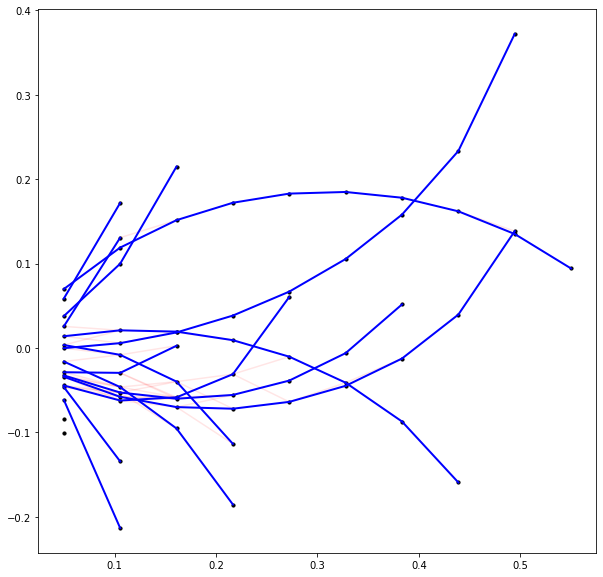

Purity:  tensor(0.5833)


In [16]:
# Plot the graph
def plot_graph(sample):
    truth_mask = sample.y == 1
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(sample.x[:,0], sample.x[:,1], s=10, c="k")
    ax.plot(sample.x[sample.edge_index[:,~truth_mask],0], sample.x[sample.edge_index[:,~truth_mask],1], c='r', alpha=0.1)
    ax.plot(sample.x[sample.edge_index[:,truth_mask],0], sample.x[sample.edge_index[:,truth_mask],1], c='b', alpha=1, linewidth=2)
    plt.show()

plot_graph(sample)
print("Purity: ", sample.y.sum() / sample.y.shape[0])